In [10]:
import pandas as pd 
import glob 
import matplotlib.pyplot as plt 
import re 
import numpy as np 

In [11]:
filenames = glob.glob('Data_Disgregada/*.csv')

### Estadística sobre las series completas

Defino el largo del meme como el intervalo de tiempo que contiene el 90% de los datos, y el volumen con la cantidad de datos en este intervalo (medios + blogs).

In [74]:
# Levanto el archivo en caso de ya haber sido creado
data_statistics = pd.read_csv('Estadistica_series_leskovec.csv')

In [76]:
data_statistics.Analyzed.value_counts()

False    71365
True       203
Name: Analyzed, dtype: int64

### Identificación de las series analizadas

En qué parte de los espacios de volumen y duración caen.

El criterio tomado fue ver las series de mayor a menor promedio entre el volumen de los blogs y el de los medios:

In [77]:
data_statistics['vol_summary'] = 0.5*(data_statistics['vol_media'] + data_statistics['vol_blog'])

In [78]:
data_statistics.sort_values(by = 'vol_summary', ascending = False)

,filename,vol_media,vol_blog,dat90,duration,fileid,Analyzed,vol_summary
62437,Data_Disgregada/Lkvec_id36543.csv,8582.0,16316.0,22408.2,3993.0,36543,False,12449.0
19323,Data_Disgregada/Lkvec_id43112.csv,9595.0,12125.0,19548.0,3761.0,43112,False,10860.0
1714,Data_Disgregada/Lkvec_id1324836.csv,8407.0,10986.0,17453.7,1501.0,1324836,False,9696.5
28512,Data_Disgregada/Lkvec_id1616375.csv,13578.0,3740.0,15586.2,3209.0,1616375,False,8659.0
64535,Data_Disgregada/Lkvec_id13891.csv,5497.0,10282.0,14201.1,3882.0,13891,False,7889.5
...,...,...,...,...,...,...,...,...
31121,Data_Disgregada/Lkvec_id837637.csv,12.0,3.0,13.5,30.0,837637,False,7.5
55905,Data_Disgregada/Lkvec_id1741671.csv,8.0,7.0,13.5,2487.0,1741671,False,7.5
19367,Data_Disgregada/Lkvec_id1880311.csv,8.0,7.0,13.5,2999.0,1880311,False,7.5
10559,Data_Disgregada/Lkvec_id2232787.csv,1.0,14.0,13.5,3176.0,2232787,False,7.5


### Figuras

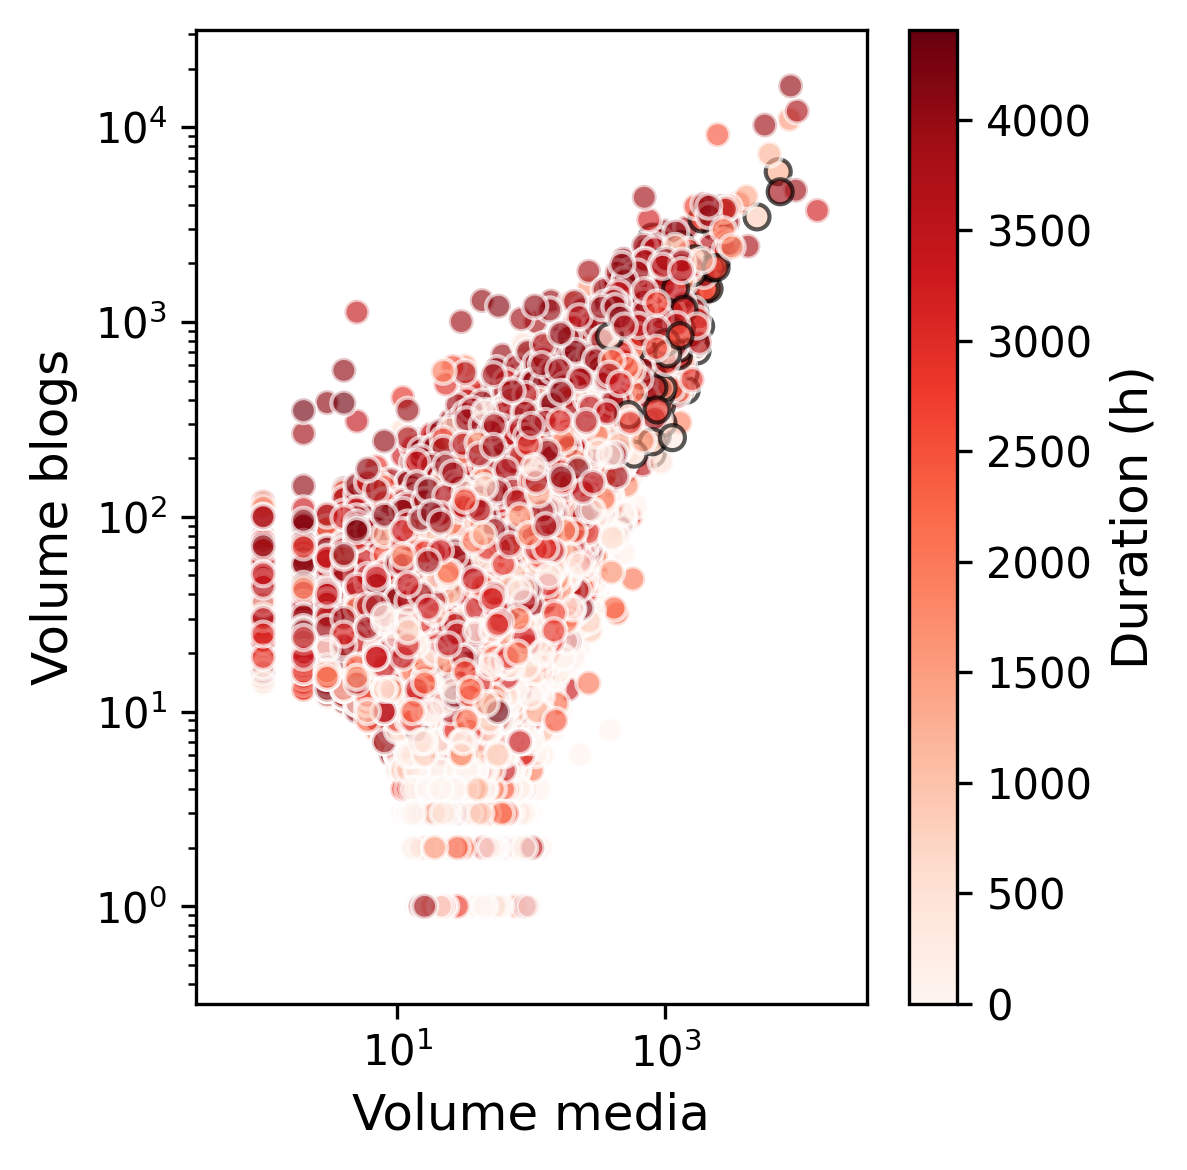

In [79]:
plt.figure(dpi = 300, figsize = (4,4))

color_dict = {True: 'r', False: 'k'}
alpha_dict = {True: 0.65, False: 0.65}
edgecolor_dict = {True: 'k', False: 'white'}

plt.scatter(data_statistics['vol_media'], data_statistics['vol_blog'], 
            edgecolors = data_statistics['Analyzed'].apply(lambda x: edgecolor_dict[x]).to_list(),
            alpha = data_statistics['Analyzed'].apply(lambda x: alpha_dict[x]).to_list(),
            c = data_statistics['duration'], cmap = 'Reds')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Volume media', size = 12)
plt.ylabel('Volume blogs', size = 12)
plt.xlim([10**-0.5, 10**4.5])
plt.ylim([10**-0.5, 10**4.5])

cbar = plt.colorbar()
cbar.set_label('Duration (h)', size = 12)

plt.tight_layout()

#plt.savefig('Leskovec_summary.png')
#plt.savefig('Leskovec_summary.pdf')

plt.show()

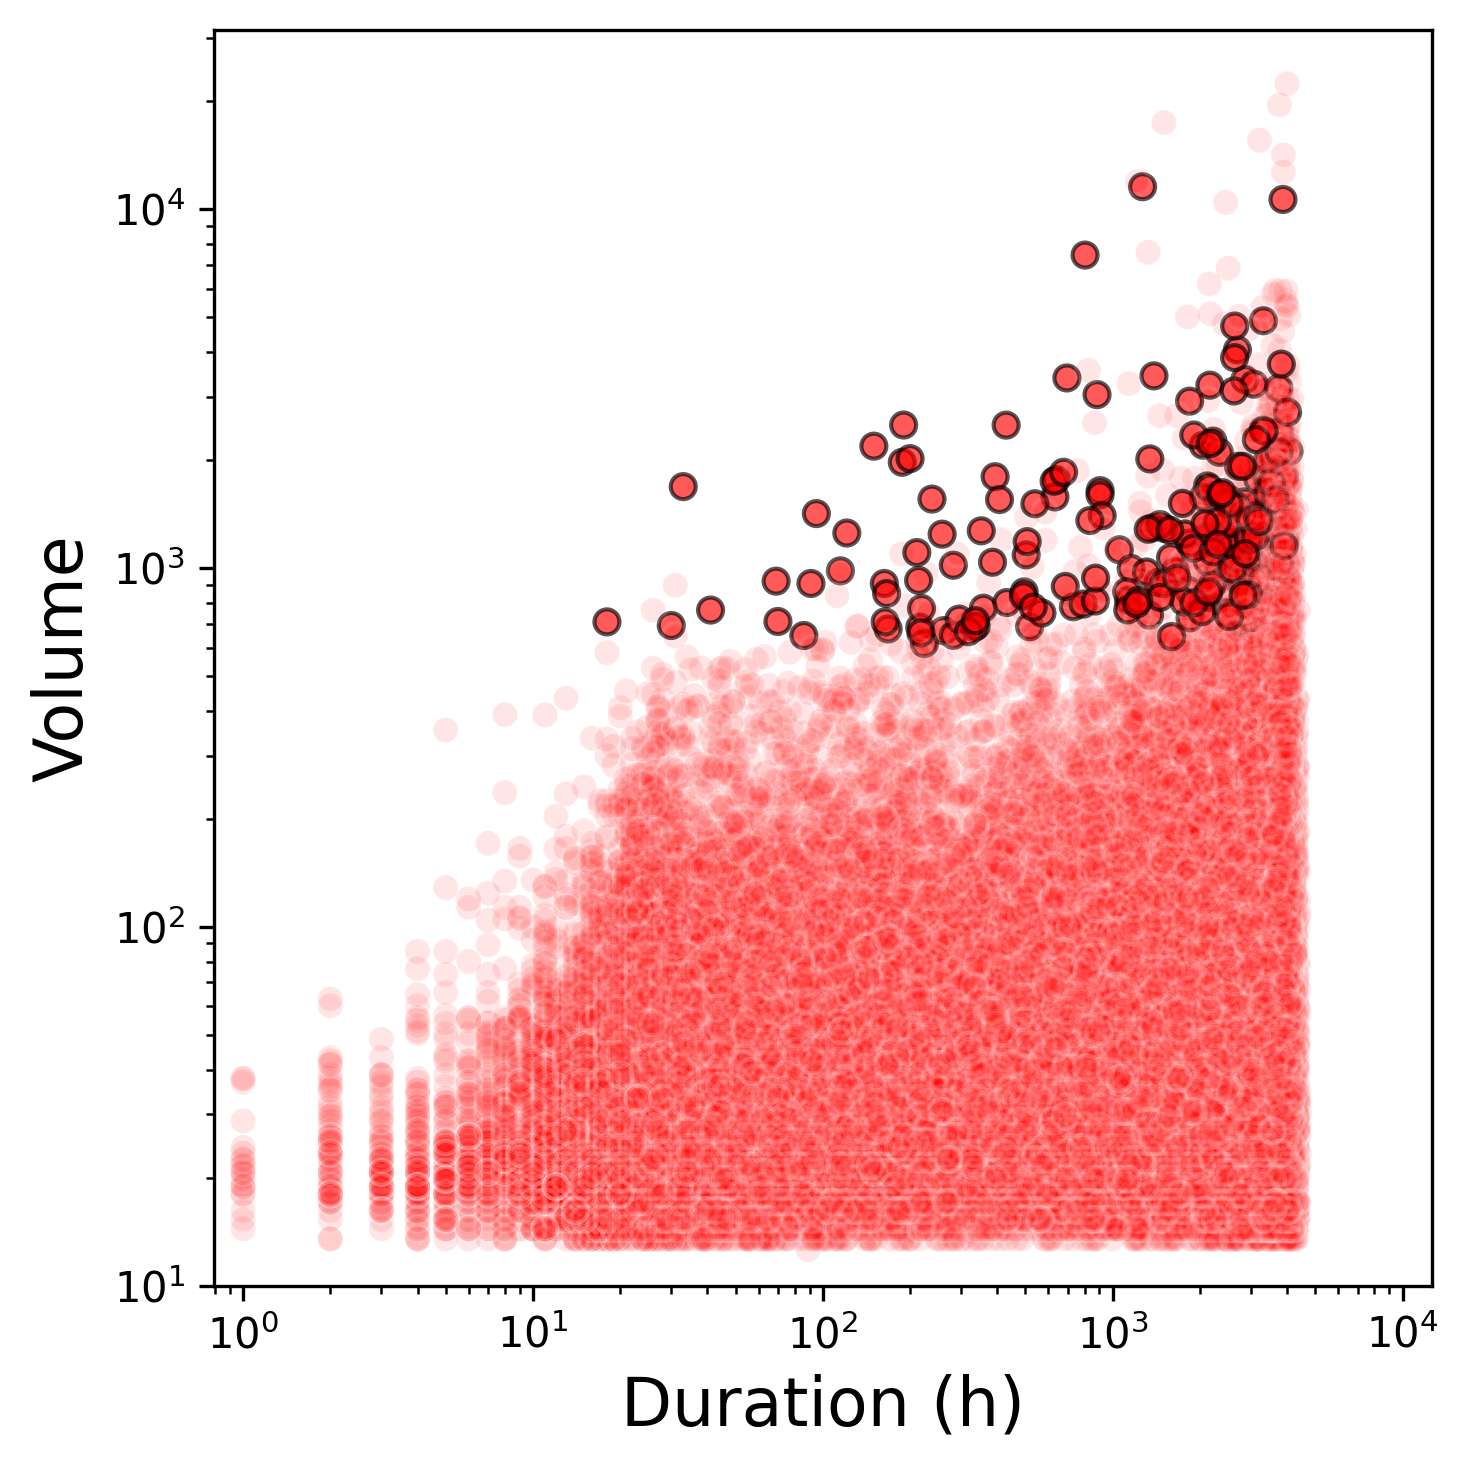

In [80]:
plt.figure(dpi = 300, figsize = (5,5))

color_dict = {True: 'r', False: 'k'}
alpha_dict = {True: 0.65, False: 0.10}
edgecolor_dict = {True: 'k', False: 'white'}

plt.scatter(data_statistics['duration'], data_statistics['dat90'], 
            edgecolors = data_statistics['Analyzed'].apply(lambda x: edgecolor_dict[x]).to_list(),
            alpha = data_statistics['Analyzed'].apply(lambda x: alpha_dict[x]).to_list(),
            c = 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Duration (h)', size = 16)
plt.ylabel('Volume', size = 16)
plt.xlim([10**-0.1, 10**4.1])
plt.ylim([10**1, 10**4.5])
plt.tight_layout()

#plt.savefig('Leskovec_summary.png')
#plt.savefig('Leskovec_summary.pdf')

plt.show()

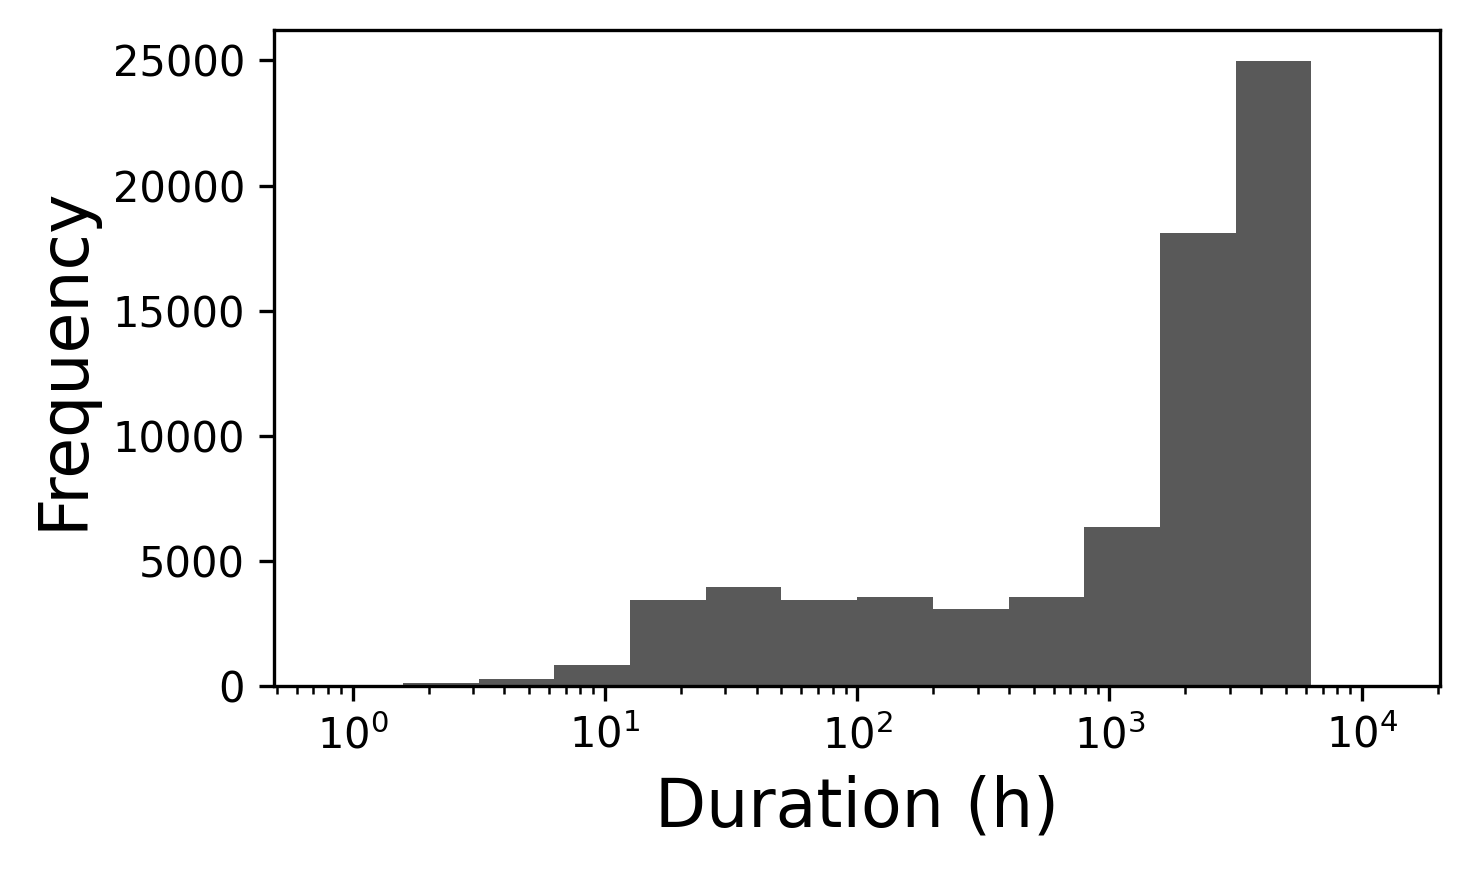

In [81]:
plt.figure(dpi = 300, figsize = (5,3))

color_dict = {True: 'r', False: 'k'}
alpha_dict = {True: 0.65, False: 0.10}
edgecolor_dict = {True: 'k', False: 'white'}

plt.hist(data_statistics['duration'], bins = np.logspace(-0.1, 4.1, 15), color = 'k', alpha = 0.65)
plt.xscale('log')
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Duration (h)', size = 16)
plt.ylabel('Frequency', size = 16)
plt.tight_layout()
plt.show()

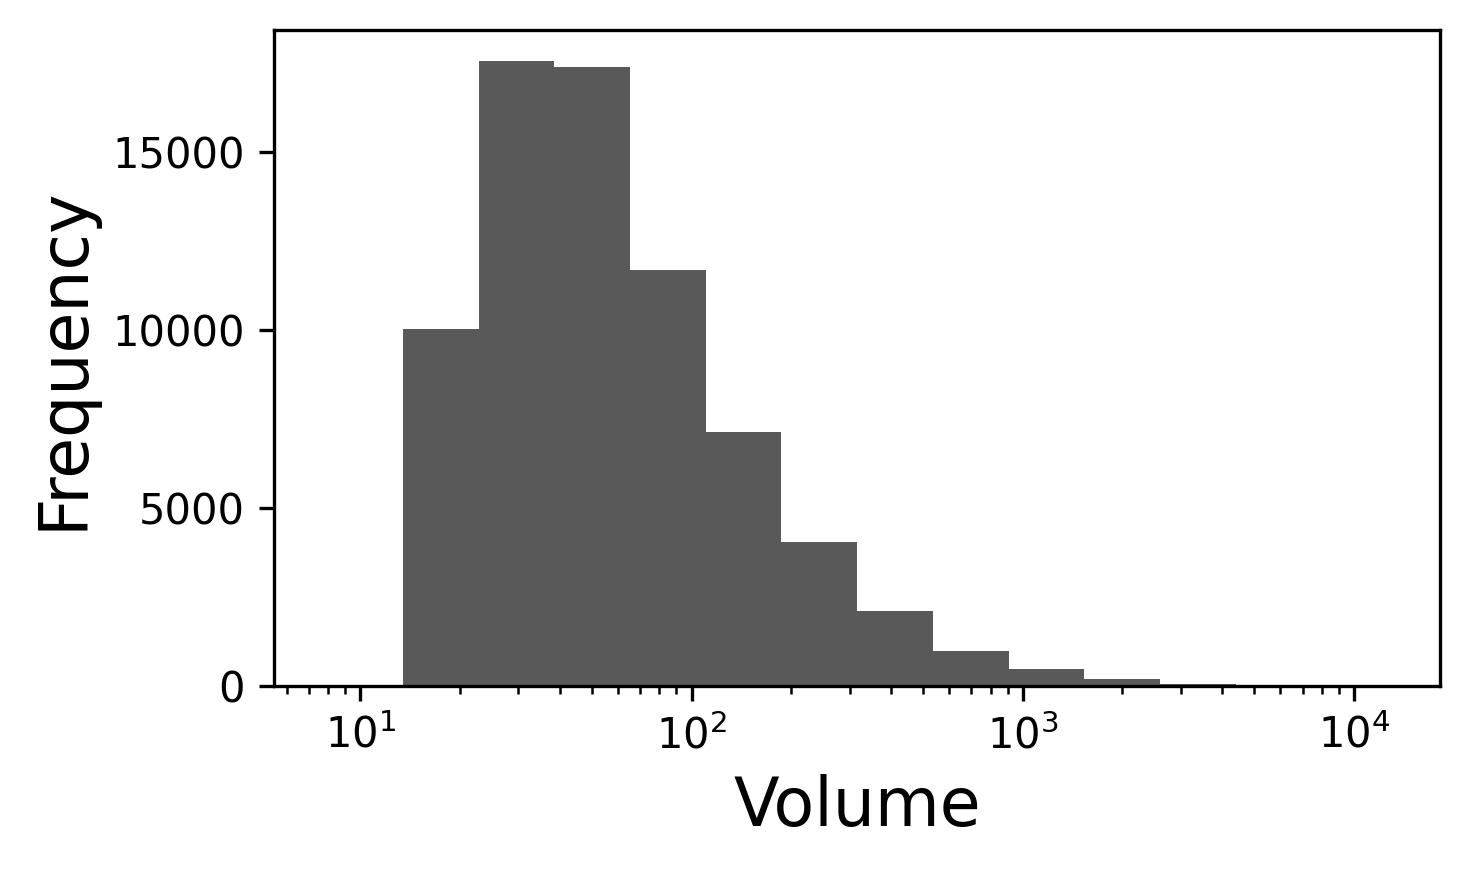

In [82]:
plt.figure(dpi = 300, figsize = (5,3))

color_dict = {True: 'r', False: 'k'}
alpha_dict = {True: 0.65, False: 0.10}
edgecolor_dict = {True: 'k', False: 'white'}

plt.hist(data_statistics['dat90'], bins = np.logspace(0.9, 4.1, 15), color = 'k', alpha = 0.65)
plt.xscale('log')
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Volume', size = 16)
plt.ylabel('Frequency', size = 16)
plt.tight_layout()
plt.show()